<a href="https://colab.research.google.com/github/Gachdotir/DigitsDetectionDemo/blob/main/DigitsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Data**

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

# **Data Info**

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
digits.images.shape

(1797, 8, 8)

In [ ]:
digits.target.shape

(1797,)

4


<Figure size 640x480 with 0 Axes>

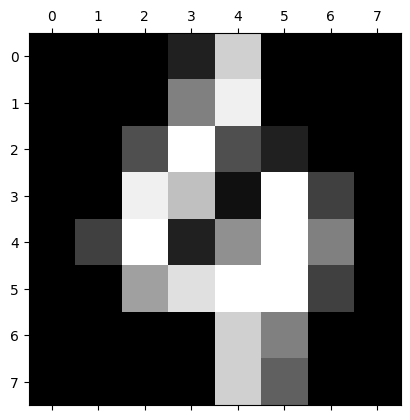

In [ ]:
import matplotlib.pyplot as plt

print(digits.target[100])
plt.gray()
plt.matshow(digits.images[100])
plt.show()

# **Preprocessing**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 64)
(540, 64)
(1257,)
(540,)


In [ ]:
X_train[0]

array([ 0.,  0.,  5., 13., 13.,  8.,  0.,  0.,  0.,  0., 16., 11., 13.,
       16.,  6.,  0.,  0.,  1., 16.,  5.,  2., 14.,  9.,  0.,  0.,  0.,
        9., 16., 16., 15.,  0.,  0.,  0.,  0., 10., 16., 14., 14.,  0.,
        0.,  0.,  5., 15.,  4.,  0., 16.,  6.,  0.,  0.,  6., 14.,  7.,
        6., 16.,  4.,  0.,  0.,  0.,  7., 15., 16., 10.,  0.,  0.])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(y_train[0])
print(X_train[0])
print(y_test[0])
print(X_test[0])

8
[0.     0.     0.3125 0.8125 0.8125 0.5    0.     0.     0.     0.
 1.     0.6875 0.8125 1.     0.375  0.     0.     0.0625 1.     0.3125
 0.125  0.875  0.5625 0.     0.     0.     0.5625 1.     1.     0.9375
 0.     0.     0.     0.     0.625  1.     0.875  0.875  0.     0.
 0.     0.3125 0.9375 0.25   0.     1.     0.375  0.     0.     0.375
 0.875  0.4375 0.375  1.     0.25   0.     0.     0.     0.4375 0.9375
 1.     0.625  0.     0.    ]
6
[0.         0.         0.         0.4375     0.75       0.
 0.         0.         0.         0.         0.25       1.
 0.5        0.         0.         0.         0.         0.
 0.75       0.6875     0.         0.         0.         0.
 0.         0.         0.9375     0.625      0.5        0.375
 0.06666667 0.         0.         0.         0.9375     1.
 0.5        0.625      0.57142857 0.         0.         0.
 0.875      0.4375     0.         0.         0.75       0.
 0.         0.         0.5        0.6875     0.         0.3125
 1.        

# **PCA**

In [ ]:
X_train.shape, X_test.shape

((1257, 64), (540, 64))

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=32)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((1257, 32), (540, 32))

# **Performance Mertrics**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def calculate_metrics(name, y_train, y_test, y_pred_train, y_pred_test):
  acc_train = accuracy_score(y_train, y_pred_train)
  acc_test = accuracy_score(y_test, y_pred_test)
  prec_test = precision_score(y_test, y_pred_test, average='weighted')
  rec_test = recall_score(y_test, y_pred_test, average='weighted')

  print(f'{name} model=> acc_train: {acc_train} - acc_test: {acc_test} - prec_test: {prec_test} - rec_test: {rec_test}')

  return acc_train, acc_test, prec_test, rec_test

# **Classification**



1.   **Random Forest**






In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=64, criterion='entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=64)

In [ ]:
y_pred_trian_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

acc_train_rf, acc_test_rf, perc_test_rf, rec_test_rf = calculate_metrics('Random Forest', y_train, y_test, y_pred_trian_rf, y_pred_test_rf)

Random Forest model=> acc_train: 1.0 - acc_test: 0.9648148148148148 - prec_test: 0.9647664391900125 - rec_test: 0.9648148148148148




1.   **KNN**



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_trian_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

acc_train_knn, acc_test_knn, perc_test_knn, rec_test_knn = calculate_metrics('Random Forest', y_train, y_test, y_pred_trian_knn, y_pred_test_knn)

Random Forest model=> acc_train: 0.9912490055688147 - acc_test: 0.9907407407407407 - prec_test: 0.9907761025641553 - rec_test: 0.9907407407407407




1.   **ANN**



In [ ]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=250)
ann.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=250)

In [ ]:
y_pred_trian_ann = ann.predict(X_train)
y_pred_test_ann = ann.predict(X_test)

acc_train_ann, acc_test_ann, perc_test_ann, rec_test_ann = calculate_metrics('Random Forest', y_train, y_test, y_pred_trian_ann, y_pred_test_ann)

Random Forest model=> acc_train: 1.0 - acc_test: 0.9722222222222222 - prec_test: 0.973500823219336 - rec_test: 0.9722222222222222




1.   SVM




In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_trian_svm = svm.predict(X_train)
y_pred_test_svm = svm.predict(X_test)

acc_train_svm, acc_test_svm, perc_test_svm, rec_test_svm = calculate_metrics('Random Forest', y_train, y_test, y_pred_trian_svm, y_pred_test_svm)

Random Forest model=> acc_train: 0.9984089101034208 - acc_test: 0.9925925925925926 - prec_test: 0.9926027516544758 - rec_test: 0.9925925925925926


# **Comparison**

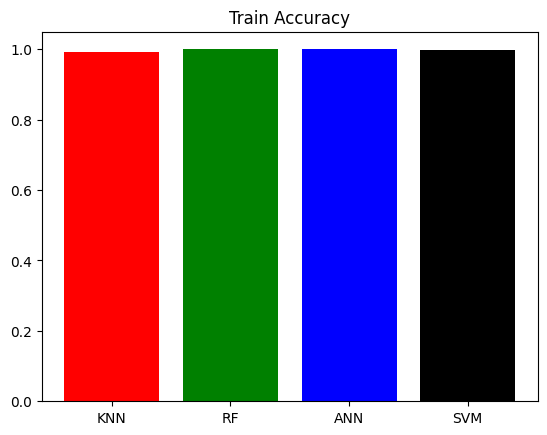

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

acc_train = [acc_train_knn,acc_train_rf, acc_train_ann, acc_train_svm]
label = ['KNN', 'RF', 'ANN', 'SVM']
color = ['red', 'green', 'blue', 'black']
plt.bar(label, acc_train, color=color)
plt.title('Train Accuracy')
plt.show()

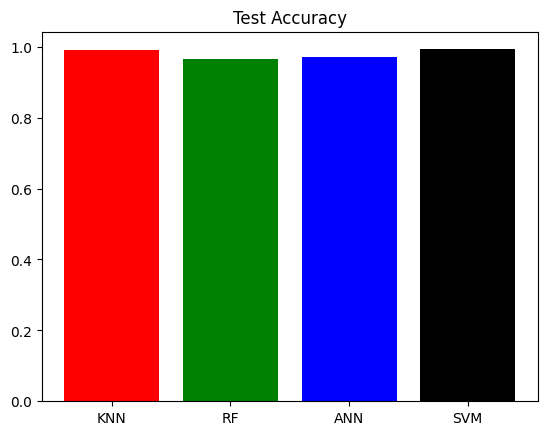

In [ ]:
acc_test = [acc_test_knn,acc_test_rf, acc_test_ann, acc_test_svm]
label = ['KNN', 'RF', 'ANN', 'SVM']
color = ['red', 'green', 'blue', 'black']
plt.bar(label, acc_test, color=color)
plt.title('Test Accuracy')
plt.show()

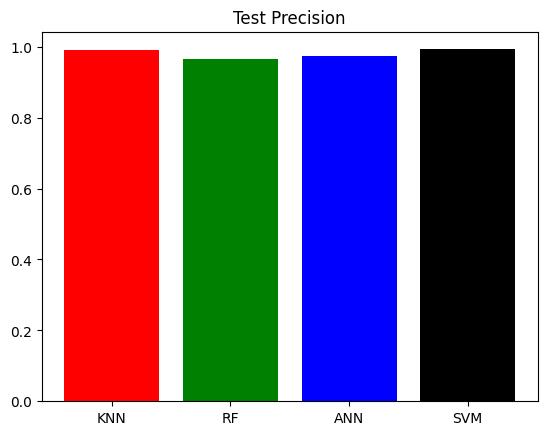

In [ ]:
perc_test = [perc_test_knn,perc_test_rf, perc_test_ann, perc_test_svm]
label = ['KNN', 'RF', 'ANN', 'SVM']
color = ['red', 'green', 'blue', 'black']
plt.bar(label, perc_test, color=color)
plt.title('Test Precision')
plt.show()

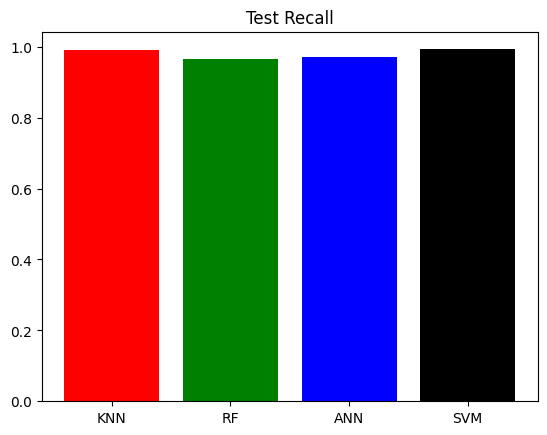

In [ ]:
rec_test = [rec_test_knn,rec_test_rf, rec_test_ann, rec_test_svm]
label = ['KNN', 'RF', 'ANN', 'SVM']
color = ['red', 'green', 'blue', 'black']
plt.bar(label, rec_test, color=color)
plt.title('Test Recall')
plt.show()

In [ ]:
data = {
    'model' : label,
    'Train Acc' : acc_train,
    'Test Acc' : acc_test,
    'Test Perc' : perc_test,
    'Test Rec' : rec_test
}
df = pd.DataFrame(data)
df

,model,Train Acc,Test Acc,Test Perc,Test Rec
0,KNN,0.991249,0.990741,0.990776,0.990741
1,RF,1.000000,0.964815,0.964766,0.964815
2,ANN,1.000000,0.972222,0.973501,0.972222
3,SVM,0.998409,0.992593,0.992603,0.992593
